In [ ]:
# repeat training to see what you get
# seems like running model.fit serveral 
# times is a good idea because the same network
# can be much butter just by chance.

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def gen_test_data():
#     x = np.linspace(-np.pi/2., np.pi/2., 100)
    x = np.linspace(-1, 1, 100)[:,np.newaxis]
    y = np.cos(20*x) + np.sin(10*x)
#     y = np.cos(50*x) + np.sin(5*x)
    return x, y

x, y = gen_test_data()


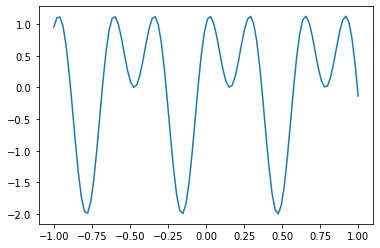

In [5]:
plt.figure()
plt.plot(x, y)
plt.show()
plt.close()

In [53]:
def get_base_model(x, y, verbose=True):
    
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(20, activation='tanh', input_shape=[1]),
        tf.keras.layers.Dense(20, activation='tanh'),
        tf.keras.layers.Dense(20, activation='tanh'),
        tf.keras.layers.Dense(20, activation='tanh'),
        tf.keras.layers.Dense(20, activation='tanh'),
        tf.keras.layers.Dense(20, activation='tanh'),
        tf.keras.layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.Adam(0.001)
    model.compile(loss='mse', optimizer=optimizer)
    
    history = model.fit(x, y, batch_size=100, epochs=1000, verbose=verbose)
    
    return history, model

In [54]:
%%time
history, model = get_base_model(x, y, verbose=False)

CPU times: user 1.72 s, sys: 237 ms, total: 1.95 s
Wall time: 1.15 s


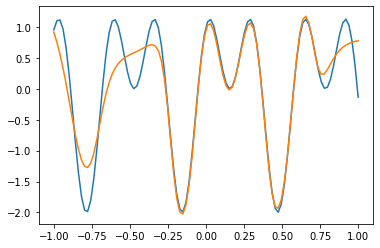

In [55]:
plt.figure()
plt.plot(x, y)
plt.plot(x, model.predict(x))

In [56]:
%%time
historys = []
models = []
for i in range(10):
    print(f"i = {i}")
    history, model = get_base_model(x, y, verbose=False)
    historys.append(history)
    models.append(model)

i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
CPU times: user 17.4 s, sys: 2.39 s, total: 19.8 s
Wall time: 11.7 s


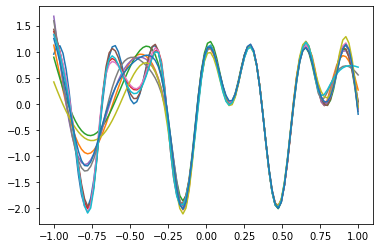

In [57]:
plt.figure()
plt.plot(x, y)
for model in models:
    plt.plot(x, model.predict(x))